# Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [5]:
X=df.drop('Species',axis=1)
y=df['Species']

In [8]:
# drop id column
X=X.drop('Id',axis=1)

In [9]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=430)

In [29]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [30]:
#checking accuracy on test set:
model.score(X,y)

0.9666666666666667

In [31]:
# get predictions on test set for creating confusion matrix:
y_pred=model.predict(X_test)

In [32]:
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor'],
      dtype='<U15')

In [33]:
#confusion matrix code:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

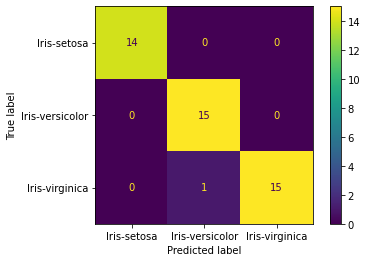

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [35]:
from sklearn.metrics import recall_score, precision_score, f1_score
prec=precision_score(y_test, y_pred,average="weighted")
recall=recall_score(y_test, y_pred,average="weighted")
f1=f1_score(y_test, y_pred,average="weighted")

In [36]:
print("Precision:{},\nRecall:{} \n F1-Score:{}".format(prec,recall,f1))

Precision:0.9791666666666666,
Recall:0.9777777777777777 
 F1-Score:0.9777777777777777
